# EDA Project

## Name    :- Aman Gavel

### <span style = "color:DarkBlue"> Importing the necessary libraries </span>

In [22]:
# import lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### <span style = "color:DarkBlue">Loading the csv file</span>

In [23]:
# Loading the csv file
df = pd.read_csv('UnicornCompanies.csv', encoding='cp1252')
df.head()

,Startup_Name,Industry,Founding_Year,Unicorn_Entry_Year,Profit_in_2021,Current_Valuation,Acquisitions,IPO_Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PhysicsWallah,Edtech,2016.0,2022.0,-$0.877 Million,$1.1 Billion,0.0,Unlisted
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LeadSquared,SaaS- CRM,2011.0,2022.0,-$1 Million,$1 BIllion,0.0,Unlisted
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Startup_Name        929 non-null    object 
 1   Industry            929 non-null    object 
 2   Founding_Year       104 non-null    float64
 3   Unicorn_Entry_Year  104 non-null    float64
 4   Profit_in_2021      67 non-null     object 
 5   Current_Valuation   104 non-null    object 
 6   Acquisitions        104 non-null    float64
 7   IPO_Status          104 non-null    object 
dtypes: float64(3), object(5)
memory usage: 116.2+ KB


### <span style = "color:DarkBlue">Checking for null values</span>

In [25]:

df.isnull().sum()

Startup_Name           929
Industry               929
Founding_Year         1754
Unicorn_Entry_Year    1754
Profit_in_2021        1791
Current_Valuation     1754
Acquisitions          1754
IPO_Status            1754
dtype: int64

### <span style = "color:DarkBlue"> Keeping only the rows containing non null values</span>

In [26]:
df = df[df['Founding_Year'].notna()]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 207
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Startup_Name        104 non-null    object 
 1   Industry            104 non-null    object 
 2   Founding_Year       104 non-null    float64
 3   Unicorn_Entry_Year  104 non-null    float64
 4   Profit_in_2021      67 non-null     object 
 5   Current_Valuation   104 non-null    object 
 6   Acquisitions        104 non-null    float64
 7   IPO_Status          104 non-null    object 
dtypes: float64(3), object(5)
memory usage: 7.3+ KB


### <span style = "color:DarkBlue">Making a graph of the Missing value count</span>

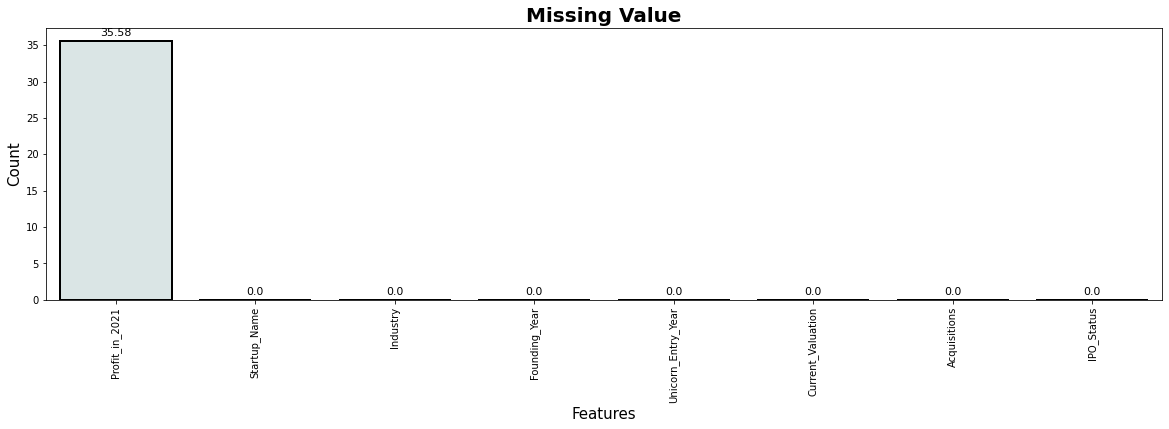

In [28]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0,3), textcoords = 'offset points')
cplot.set_title('Missing Value', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

### <span style = "color:DarkBlue"> Data after clearing missing values</span>

In [38]:
df.head()

,Startup_Name,Industry,Founding_Year,Unicorn_Entry_Year,Profit_in_2021,Current_Valuation,Acquisitions,IPO_Status
1,PhysicsWallah,Edtech,2016.0,2022.0,-$0.877 Million,$1.1 Billion,0.0,Unlisted
3,LeadSquared,SaaS- CRM,2011.0,2022.0,-$1 Million,$1 BIllion,0.0,Unlisted
5,ElasticRun,E-commerce Logistics,2015.0,2022.0,-$12 Million,$1.5 Billion,0.0,Unlisted
7,LEAD School,Edtech,2012.0,2022.0,-$15 Million,$1.1 Billion,1.0,Unlisted
9,Purplle,E-commerce Personal Care,2012.0,2022.0,-$6 Million,$1.1 Billion,1.0,Unlisted


### <span style = "color:DarkBlue">Getting to know the Minimum values </span>

In [29]:
df.min()

C:\Users\Aman\AppData\Local\Temp/ipykernel_14744/3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


Startup_Name                    Acko
Industry                      Adtech
Founding_Year                 1984.0
Unicorn_Entry_Year            2010.0
Current_Valuation     $0.013 Billion
Acquisitions                     0.0
IPO_Status                    Listed
dtype: object

## <span style = "color:DarkBlue">Plotting the startups vs year plot</span>
### <span style = "color:DarkGreen">This is to get an idea on which year has most startups which later became unicron</span>

Text(0.5, 0, 'Founding_Year')

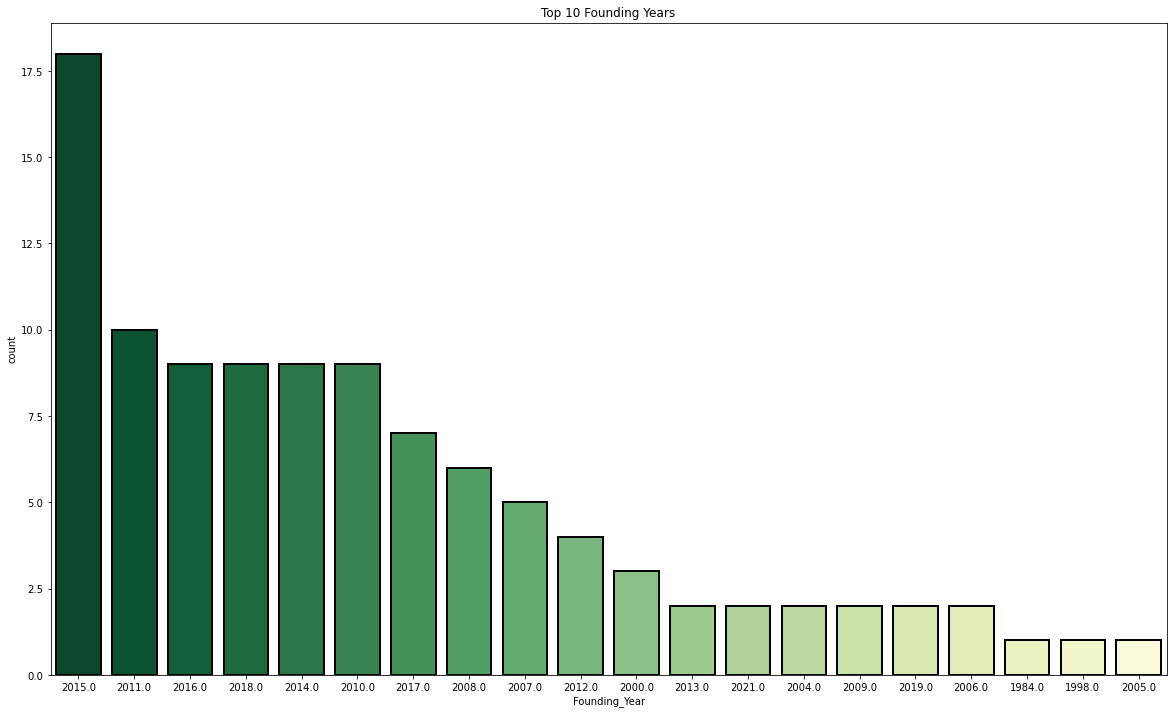

In [30]:
plt.figure(figsize = (20,12))
ax = sns.countplot(x ='Founding_Year',lw=2, ec='black', data = df, palette = 'YlGn_r',
              order = df['Founding_Year'].value_counts().index[0:9000])
# Adding Annotation
fontsize=15
plt.title('Top 10 Founding Years')
plt.xlabel('Founding_Year')


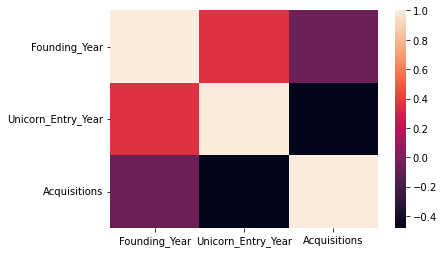

In [31]:
sns.heatmap(df.corr(), linecolor='w');

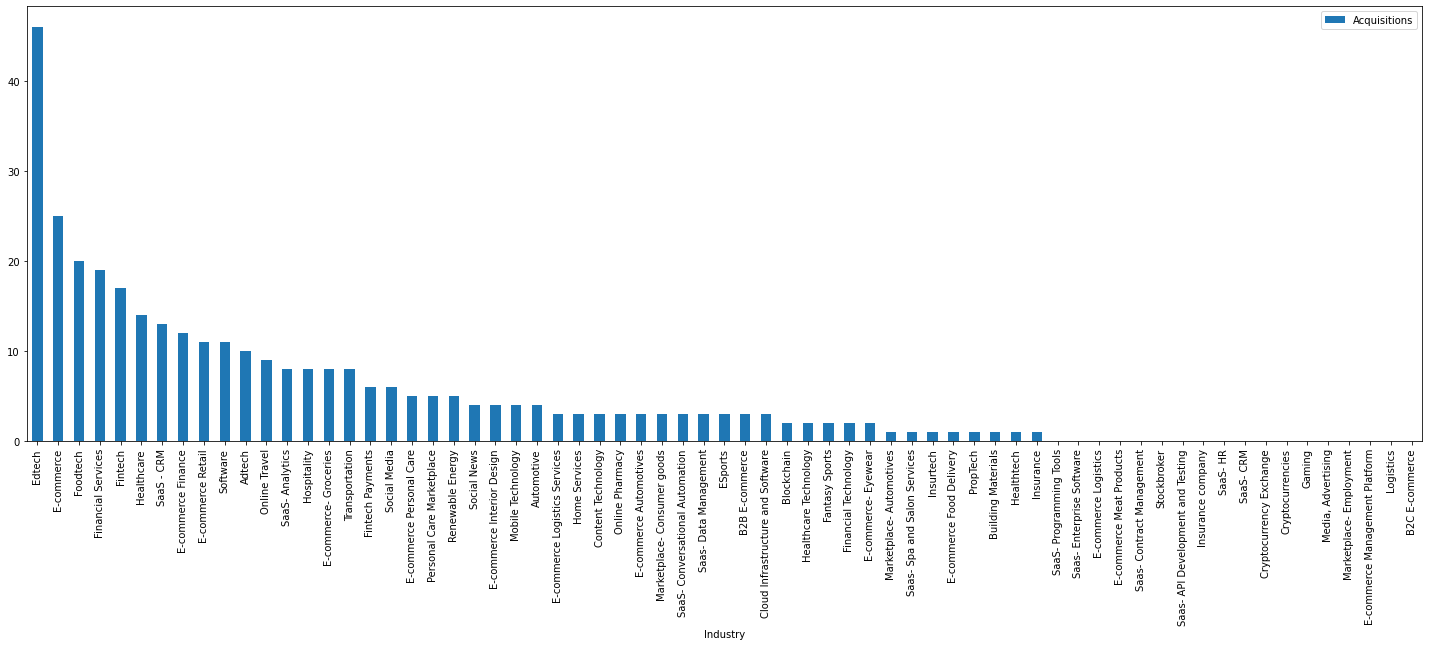

In [56]:
states= df.groupby(['Industry'])[['Acquisitions']].sum()
states.sort_values("Acquisitions", ascending=False).plot(kind = 'bar', figsize = (25,8))
plt.show()

In [33]:
years = df['Unicorn_Entry_Year']-df['Founding_Year']

In [37]:
print(years.sum()/109)

7.376146788990826
